In [1]:
import wget
import os

# set the working directory to the `earth-analytics-bootcamp` directory
# replace `jpalomino` with your username here and all paths in this lesson
os.chdir("C:/Users/Mathieu_Josserand/Desktop")

dossier = "projetInfo_Smartphone_ESILV/"
if not os.path.exists(dossier):
    os.mkdir(dossier)

# print the current working directory
os.getcwd()

'C:\\Users\\Mathieu_Josserand\\Desktop'

In [8]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
from pprint import pprint

seed =45
%matplotlib inline
plt.style.use('fivethirtyeight')

### Importation des données train, test, le nom des colonnes des fichiers .txt

In [3]:
col = pd.read_csv(dossier+"features.txt", sep='\t', encoding='latin-1', header=None) # regardez le séparateur au desus
df_train = pd.read_csv(dossier+"Train/X_train.txt", sep=' ', encoding='latin-1', header=None) # regardez le séparateur au desus
df_test = pd.read_csv(dossier+"Test/X_test.txt", sep=' ', encoding='latin-1', header=None) # regardez le séparateur au desus
activity_id_train = pd.read_csv(dossier+"Train/y_train.txt", sep=' ', encoding='latin-1', header=None) # regardez le séparateur au desus
activity_id_test = pd.read_csv(dossier+"Test/y_test.txt", sep=' ', encoding='latin-1', header=None) # regardez le séparateur au desus

In [4]:
print("col : ", col.shape, "\n")
print("df_train : ", df_train.shape)
print("activity_id_train : ", activity_id_train.shape, "\n")
print("df_test : ", df_test.shape)
print("activity_id_test : ", activity_id_test.shape)

col :  (561, 1) 

df_train :  (7767, 561)
activity_id_train :  (7767, 1) 

df_test :  (3162, 561)
activity_id_test :  (3162, 1)


### Fusion des df en un seul et unique df (attention a bien garder l'ordre train puis test)

In [9]:
df = pd.concat([df_train, df_test], ignore_index=True)
activity_id = pd.concat([activity_id_train, activity_id_test],  ignore_index=True)
df['activity_id'] = activity_id
col.loc[len(col), 0] = "activity_id" #ajout de la nouvelle colonne dans la liste des colonnes

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,activity_id
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,5
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,5
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,5


### Changement des noms de colonnes de df

In [10]:
df.columns = [col[0][i] for i in range(562)]
df.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,activity_id
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,5
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,5
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,5


In [8]:
df.dtypes

tBodyAcc-Mean-1                    float64
tBodyAcc-Mean-2                    float64
tBodyAcc-Mean-3                    float64
tBodyAcc-STD-1                     float64
tBodyAcc-STD-2                     float64
                                    ...   
tBodyGyroJerk-AngleWRTGravity-1    float64
tXAxisAcc-AngleWRTGravity-1        float64
tYAxisAcc-AngleWRTGravity-1        float64
tZAxisAcc-AngleWRTGravity-1        float64
activity_id                          int64
Length: 562, dtype: object

In [9]:
df.describe()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,activity_id
count,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,...,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000
mean,0.039271,-0.000950,-0.018530,-0.602128,-0.633645,-0.697054,-0.627605,-0.656793,-0.745335,-0.359687,...,-0.307343,-0.616570,0.016287,0.019261,0.019060,-0.009669,-0.493295,0.055363,-0.050784,3.932839
std,0.101868,0.100673,0.088223,0.431281,0.365457,0.311368,0.407387,0.346456,0.264000,0.493557,...,0.313980,0.304882,0.330879,0.443168,0.608841,0.484347,0.508506,0.308471,0.266147,2.179758
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.031874,-0.011334,-0.028568,-0.991588,-0.982717,-0.983748,-0.992456,-0.983425,-0.985939,-0.795128,...,-0.540997,-0.839609,-0.108841,-0.257741,-0.474747,-0.389165,-0.816662,-0.035500,-0.130120,2.000000
50%,0.038939,-0.002859,-0.019558,-0.896268,-0.789857,-0.806782,-0.909166,-0.811565,-0.837539,-0.709558,...,-0.343977,-0.701562,0.016339,0.030075,0.012446,-0.009524,-0.711081,0.176461,-0.000182,4.000000
75%,0.043908,0.004553,-0.011525,-0.253824,-0.325816,-0.462371,-0.304344,-0.373108,-0.554729,0.053881,...,-0.124693,-0.488104,0.165890,0.315118,0.526513,0.359450,-0.503817,0.249083,0.105739,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000


In [10]:
#Nombre de NA par colonnes
df.isna().sum().sort_values(ascending=True)

tBodyAcc-Mean-1                    0
fBodyAccJerk-BandsEnergyOld-3      0
fBodyAccJerk-BandsEnergyOld-2      0
fBodyAccJerk-BandsEnergyOld-1      0
fBodyAccJerk-Kurtosis-1            0
                                  ..
tBodyGyroJerk-ARCoeff-4            0
tBodyGyroJerk-ARCoeff-5            0
tBodyGyroJerk-ARCoeff-6            0
tBodyGyroJerk-ropy-1               0
activity_id                        0
Length: 562, dtype: int64

#### Aucune valeur non renseignée dans le dataset

In [11]:
scaler = StandardScaler()
scaler.fit(df)#trouve la moyenne et l'ecart type
df_norm = scaler.transform(df)#normalize
df_norm = pd.DataFrame(df_norm)
df_norm.columns = [col[0][i] for i in range(562)]
df_norm.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,activity_id
0,0.042298,-0.049870,-0.187308,-0.911869,-0.970667,-0.771881,-0.901890,-0.958385,-0.787879,-0.881618,...,-0.023906,-0.317310,-0.390013,0.025137,-0.794696,-0.018123,-0.684908,0.403784,-0.003510,0.4896
1,0.002051,-0.011736,-0.119443,-0.918748,-0.955833,-0.880731,-0.910960,-0.942507,-0.866196,-0.897302,...,-0.942323,-0.800696,0.112403,-0.060240,-1.234675,1.472522,-0.691857,0.404913,0.012580,0.4896
2,0.006938,-0.041750,-0.046707,-0.912103,-0.940424,-0.924047,-0.905346,-0.920916,-0.911551,-0.889077,...,-0.309222,-0.476525,-0.407558,0.357981,0.134096,1.689357,-0.699995,0.406043,0.031988,0.4896
3,0.005041,-0.107868,-0.117724,-0.913754,-0.971222,-0.951335,-0.906768,-0.957550,-0.938682,-0.889077,...,0.538180,0.409900,-0.160413,-0.072557,1.019937,-0.982187,-0.699437,0.410249,0.037418,0.4896
4,-0.005036,-0.013298,-0.060448,-0.918501,-0.966312,-0.950885,-0.909767,-0.951641,-0.941293,-0.896177,...,-0.187508,-0.281826,0.323496,0.233062,1.107924,-1.251849,-0.697898,0.420677,0.051494,0.4896


In [12]:
df_norm.describe()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,activity_id
count,1.092900e+04,1.092900e+04,1.092900e+04,1.092900e+04,1.092900e+04,1.092900e+04,1.092900e+04,1.092900e+04,1.092900e+04,1.092900e+04,...,1.092900e+04,1.092900e+04,1.092900e+04,1.092900e+04,1.092900e+04,1.092900e+04,1.092900e+04,1.092900e+04,1.092900e+04,1.092900e+04
mean,2.148524e-18,-6.119864e-18,-1.213687e-17,2.219633e-17,-1.976439e-16,-5.724318e-17,-2.193018e-16,2.586660e-16,6.676170e-17,3.967912e-17,...,-2.388976e-16,-2.718111e-16,-9.691214e-18,2.442105e-17,5.215377e-17,-3.161835e-18,2.852508e-17,-5.497783e-17,-1.551305e-16,1.559127e-16
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,...,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-1.020258e+01,-9.924145e+00,-1.112539e+01,-9.225787e-01,-1.002503e+00,-9.729960e-01,-9.141466e-01,-9.906686e-01,-9.646858e-01,-1.297402e+00,...,-2.206159e+00,-1.257691e+00,-3.071618e+00,-2.300045e+00,-1.673847e+00,-2.044766e+00,-9.965041e-01,-3.421427e+00,-3.566666e+00,-1.345550e+00
25%,-7.261670e-02,-1.031472e-01,-1.137831e-01,-9.030735e-01,-9.552102e-01,-9.207970e-01,-8.956277e-01,-9.428247e-01,-9.114233e-01,-8.822904e-01,...,-7.442043e-01,-7.315911e-01,-3.781868e-01,-6.250774e-01,-8.110975e-01,-7.835564e-01,-6.359460e-01,-2.945736e-01,-2.981009e-01,-8.867625e-01
50%,-3.256756e-03,-1.896555e-02,-1.165076e-02,-6.820474e-01,-4.274626e-01,-3.524233e-01,-6.911691e-01,-4.467500e-01,-3.492730e-01,-7.089078e-01,...,-1.166842e-01,-2.787840e-01,1.577719e-04,2.440326e-02,-1.086371e-02,2.978475e-04,-4.283053e-01,3.925944e-01,1.901382e-01,3.081252e-02
75%,4.552541e-02,5.466245e-02,7.941134e-02,8.076413e-01,8.423508e-01,7.537486e-01,7.935365e-01,8.188569e-01,7.220254e-01,8.379732e-01,...,5.817507e-01,4.213811e-01,4.521598e-01,6.676255e-01,8.335115e-01,7.621294e-01,-2.069409e-02,6.280285e-01,5.881331e-01,4.896000e-01
max,9.431523e+00,9.943016e+00,1.154549e+01,3.714985e+00,4.470345e+00,5.450564e+00,3.995413e+00,4.782337e+00,6.611430e+00,2.755000e+00,...,4.163972e+00,5.302518e+00,2.973167e+00,2.213118e+00,1.611234e+00,2.084692e+00,2.936766e+00,3.062461e+00,3.948309e+00,3.701112e+00


### Analyse de la distribution des données Y

In [12]:
unwanted = ['activity_id']
X = df.drop(unwanted,axis=1)
y = pd.DataFrame(df['activity_id'])
X_norm = df_norm.drop(unwanted,axis=1)
y_norm = pd.DataFrame(df_norm['activity_id'])
X.shape, y.shape, df.shape, X_norm.shape, y_norm.shape

((10929, 561), (10929, 1), (10929, 562), (10929, 561), (10929, 1))

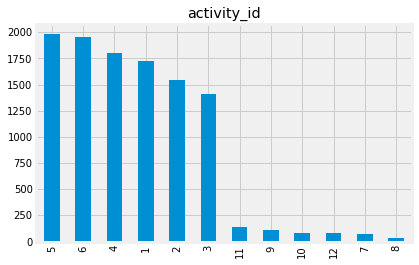

In [16]:
y_list = list(y)
y.iloc[:,0].value_counts().plot(kind='bar',title=y_list[0])
labels = ['1 WALKING','2 WALKING_UPSTAIRS','3 WALKING_DOWNSTAIRS 4 SITTING','5 STANDING','6 LAYING','7 STAND_TO_SIT','8 SIT_TO_STAND','9 SIT_TO_LIE','10 LIE_TO_SIT','11 STAND_TO_LIE','12 LIE_TO_STAND']

Nom activité : 
1 WALKING
2 WALKING_UPSTAIRS
3 WALKING_DOWNSTAIRS 4 SITTING
5 STANDING
6 LAYING
7 STAND_TO_SIT
8 SIT_TO_STAND
9 SIT_TO_LIE
10 LIE_TO_SIT
11 STAND_TO_LIE
12 LIE_TO_STAND 

##### Du fait que des labels sont très sous représentés dans l'ensemble des labels, nous sommes dans un cas de imbalanced multiclass dataset. C'est pourquoi lors des phases d'apprentissage du modèle, l'attention sera portée sur la représentation de chaque classe dans le dataset d'entrainement. 
##### Pour cela nous utiliserons la méthode StratifiedKFold

### il faut construire correctement un train & test avec une représentation de chacune des outputs possibles

In [17]:
y.iloc[:,0].value_counts()

5     1979
6     1958
4     1801
1     1722
2     1544
3     1407
11     139
9      107
10      85
12      84
7       70
8       33
Name: activity_id, dtype: int64

In [18]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


y

,activity_id
0,5
1,5
2,5
3,5
4,5
...,...
10924,2
10925,2
10926,2
10927,2


In [13]:
def get_score(algorithme, X, y):
    
    #Chaque classe est représenté lors de l'entrainement
    kf = StratifiedKFold(n_splits= 4,shuffle=True,random_state=seed)
    cv_score =[]
    i=1
    
    #Début Cross Valid avec l'approche stratifiedKFold
    for train_index, test_index in kf.split(X,y):
        print('{} of KFold {} ...'.format(i, kf.n_splits))
        X_train, X_test = X.loc[train_index],X.loc[test_index]
        y_train, y_test = y.loc[train_index],y.loc[test_index]
        
        print("X_train:{} , X_test:{} ,  y_train:{} ,  y_test:{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
        #print("Distribution Données entrainement")
        #print(y_train.iloc[:,0].value_counts(), "\n")
        #print("Distribution Données test")
        #print(y_test.iloc[:,0].value_counts(), "\n")
    
        #model
        algo = algorithme
        #Entrainement model
        algo.fit(X_train, y_train)
        
        #Predictions
        y_pred = algo.predict(X_test)
        
        #Test
        score = algo.score(X_test, y_test)
        print("Score accuracy : ", score, "\n")
    
        cv_score.append(score)
        i+=1
    
    #Affichage score model
    print('Cv Scores : ',cv_score,'\nMean Cross Validation Score : ',np.mean(cv_score))
    
    
    #Affichage matrice de confusion
    cm = confusion_matrix(y_test, y_pred, np.unique(y))#matrice de confusion    
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels = labels, yticklabels= labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)
    

### Arbre de décision

1 of KFold 4 ...
X_train:(8192, 561) , X_test:(2737, 561) ,  y_train:(8192, 1) ,  y_test:(2737, 1)
Score accuracy :  0.9042747533796127 

2 of KFold 4 ...
X_train:(8195, 561) , X_test:(2734, 561) ,  y_train:(8195, 1) ,  y_test:(2734, 1)
Score accuracy :  0.9180687637161667 

3 of KFold 4 ...
X_train:(8198, 561) , X_test:(2731, 561) ,  y_train:(8198, 1) ,  y_test:(2731, 1)
Score accuracy :  0.9190772610765288 

4 of KFold 4 ...
X_train:(8202, 561) , X_test:(2727, 561) ,  y_train:(8202, 1) ,  y_test:(2727, 1)
Score accuracy :  0.9075907590759076 

Cv Scores :  [0.9042747533796127, 0.9180687637161667, 0.9190772610765288, 0.9075907590759076] 
Mean Cross Validation Score :  0.9122528843120541


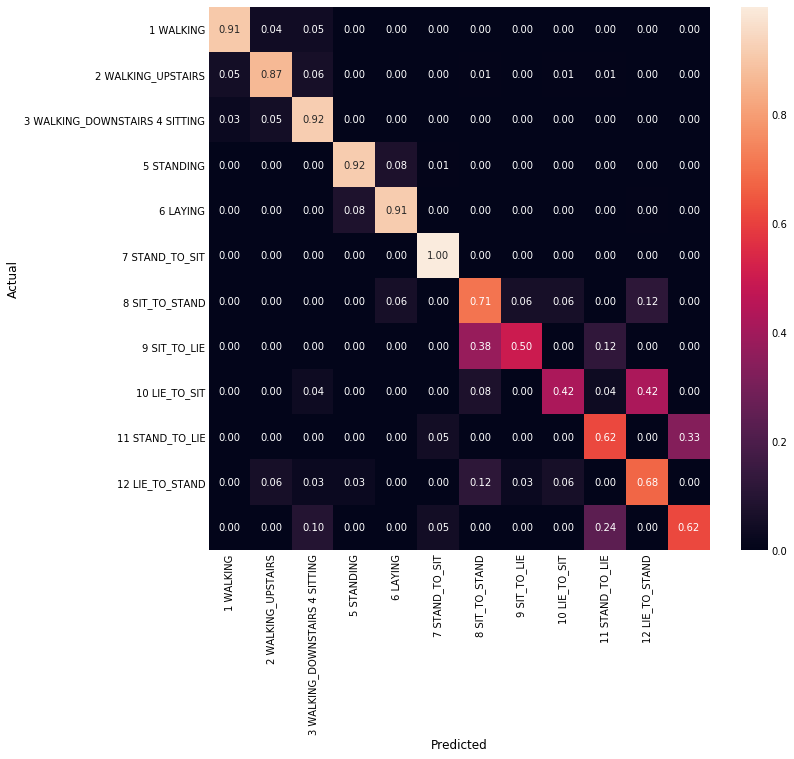

In [21]:
#Model avec donnees brutes
get_score(DecisionTreeClassifier(), X,y)

###### Pour ce premier modèle simple utilisant un arbre de décision, voici la matrice de confusion ci-dessus, ici on se rend compte que les résultats sont plutot positifs puisque pour les 7 premieres acitivitées ( 1 à 7) les taux de réussite sont supérieurs à 90% avec presque aucune  prédiction fausse et complètement absurde
##### C'est seulement pour les activités les moins représentées dans notre dataset que le modèle a le plus de mal. En effet, du fait du petit nombre d'apprentissage le modèle a du mal a différencier les activités entre 8 et 12

1 of KFold 4 ...
X_train:(8192, 561) , X_test:(2737, 561) ,  y_train:(8192, 1) ,  y_test:(2737, 1)
Score accuracy :  0.9039093898428937 

2 of KFold 4 ...
X_train:(8195, 561) , X_test:(2734, 561) ,  y_train:(8195, 1) ,  y_test:(2734, 1)
Score accuracy :  0.9173372348207754 

3 of KFold 4 ...
X_train:(8198, 561) , X_test:(2731, 561) ,  y_train:(8198, 1) ,  y_test:(2731, 1)
Score accuracy :  0.9183449285975833 

4 of KFold 4 ...
X_train:(8202, 561) , X_test:(2727, 561) ,  y_train:(8202, 1) ,  y_test:(2727, 1)
Score accuracy :  0.9020902090209021 

Cv Scores :  [0.9039093898428937, 0.9173372348207754, 0.9183449285975833, 0.9020902090209021] 
Mean Cross Validation Score :  0.9104204405705387


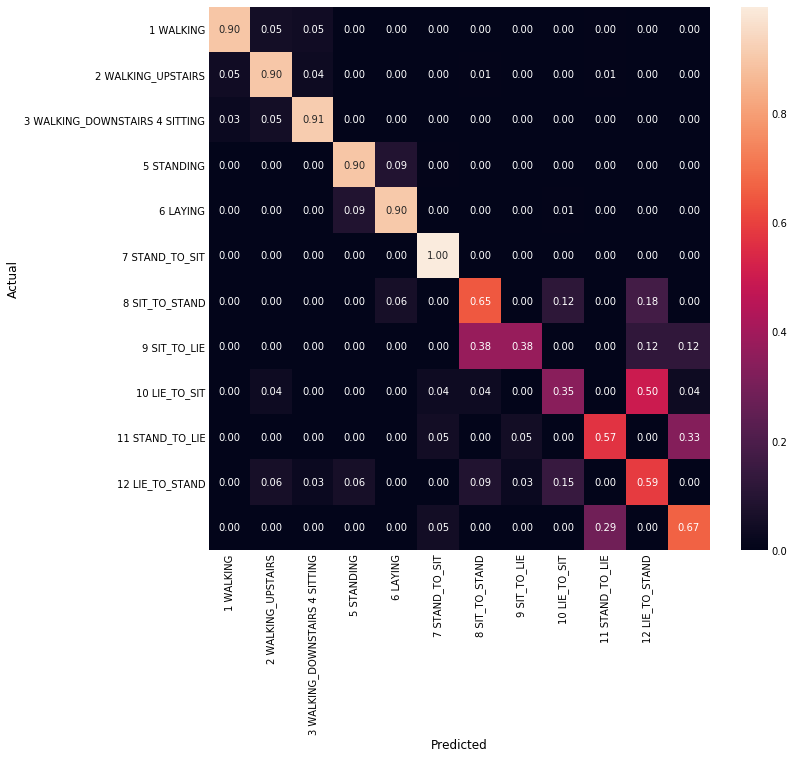

In [23]:
#Model avec données norm
get_score(DecisionTreeClassifier(), X_norm,y)

### Random Forest

1 of KFold 4 ...
X_train:(8192, 561) , X_test:(2737, 561) ,  y_train:(8192, 1) ,  y_test:(2737, 1)


C:\Users\Mathieu_Josserand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mathieu_Josserand\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score accuracy :  0.9455608330288637 

2 of KFold 4 ...
X_train:(8195, 561) , X_test:(2734, 561) ,  y_train:(8195, 1) ,  y_test:(2734, 1)


C:\Users\Mathieu_Josserand\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score accuracy :  0.9553767373811266 

3 of KFold 4 ...
X_train:(8198, 561) , X_test:(2731, 561) ,  y_train:(8198, 1) ,  y_test:(2731, 1)


C:\Users\Mathieu_Josserand\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score accuracy :  0.9428780666422556 

4 of KFold 4 ...
X_train:(8202, 561) , X_test:(2727, 561) ,  y_train:(8202, 1) ,  y_test:(2727, 1)


C:\Users\Mathieu_Josserand\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score accuracy :  0.9460946094609461 

Cv Scores :  [0.9455608330288637, 0.9553767373811266, 0.9428780666422556, 0.9460946094609461] 
Mean Cross Validation Score :  0.947477561628298


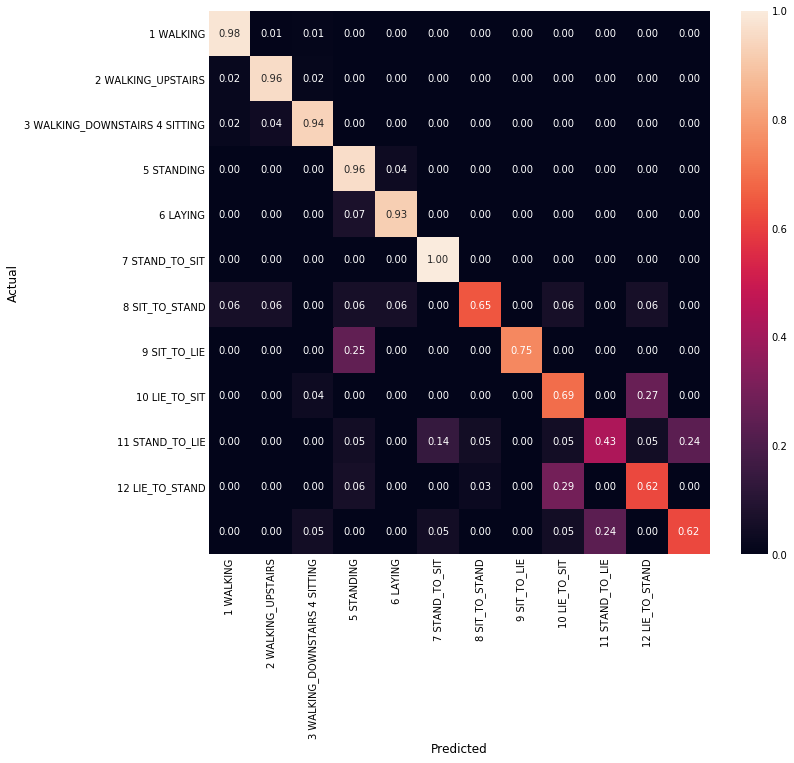

In [24]:
#RF avec données brutes
get_score(RandomForestClassifier(), X,y)

#####  Pour le RF, l'accuracy est supérieure a 5% meilleur que l'arbre de décision, ce qui améliore donc la matrice de confusion. Seulement les activités 8 à 12 sont toujours difficiles à prédire pour le modèle.

1 of KFold 4 ...
X_train:(8192, 561) , X_test:(2737, 561) ,  y_train:(8192, 1) ,  y_test:(2737, 1)


C:\Users\Mathieu_Josserand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mathieu_Josserand\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score accuracy :  0.9532334672999635 

2 of KFold 4 ...
X_train:(8195, 561) , X_test:(2734, 561) ,  y_train:(8195, 1) ,  y_test:(2734, 1)


C:\Users\Mathieu_Josserand\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score accuracy :  0.9546452084857352 

3 of KFold 4 ...
X_train:(8198, 561) , X_test:(2731, 561) ,  y_train:(8198, 1) ,  y_test:(2731, 1)


C:\Users\Mathieu_Josserand\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score accuracy :  0.9458073965580374 

4 of KFold 4 ...
X_train:(8202, 561) , X_test:(2727, 561) ,  y_train:(8202, 1) ,  y_test:(2727, 1)


C:\Users\Mathieu_Josserand\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score accuracy :  0.9446277961129447 

Cv Scores :  [0.9532334672999635, 0.9546452084857352, 0.9458073965580374, 0.9446277961129447] 
Mean Cross Validation Score :  0.9495784671141702


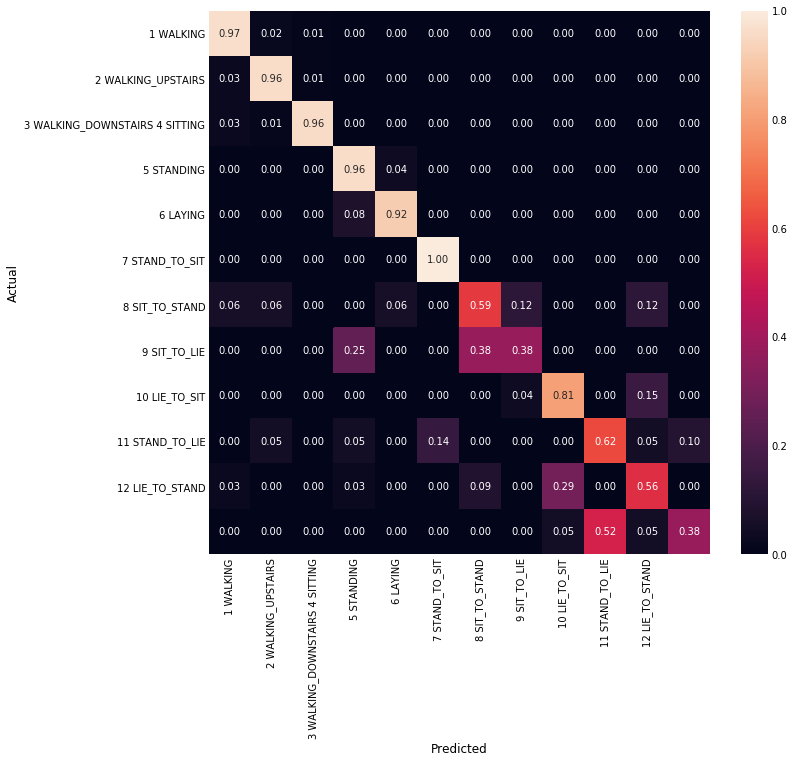

In [25]:
#RF données norm
get_score(RandomForestClassifier(), X_norm,y)

### Tuning RF

In [22]:
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 300, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 210, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20,
                  34,
                  49,
                  64,
                  78,
                  93,
                  108,
                  123,
                  137,
                  152,
                  167,
                  182,
                  196,
                  211,
                  226,
                  241,
                  255,
                  270,
                  285,
                  300]}


In [23]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 4,
                               verbose=2, random_state=42, n_jobs = -1)# Fit the random search model


#Les proportions pour chacune des classes sont respectés (comme pour le stratifieldKFold)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234) 

#Entrainement
rf_random.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 83.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 197.7min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 234.9min finished
C:\Users\Mathieu_Josserand\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [33]:
#Selection des meilleurs parametres
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=30,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=196,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [34]:
#Predictions
y_pred = rf_random.predict(X_test)

score = rf_random.score(X_test, y_test)
print("Score accuracy : ", score, "\n")

Score accuracy :  0.9748275067649363 



In [58]:
a = np.around(y_pred, decimals=0)
y_pred_arr = a.astype(int)
y_pred_arr

array([10,  2,  4, ...,  6,  6,  1])

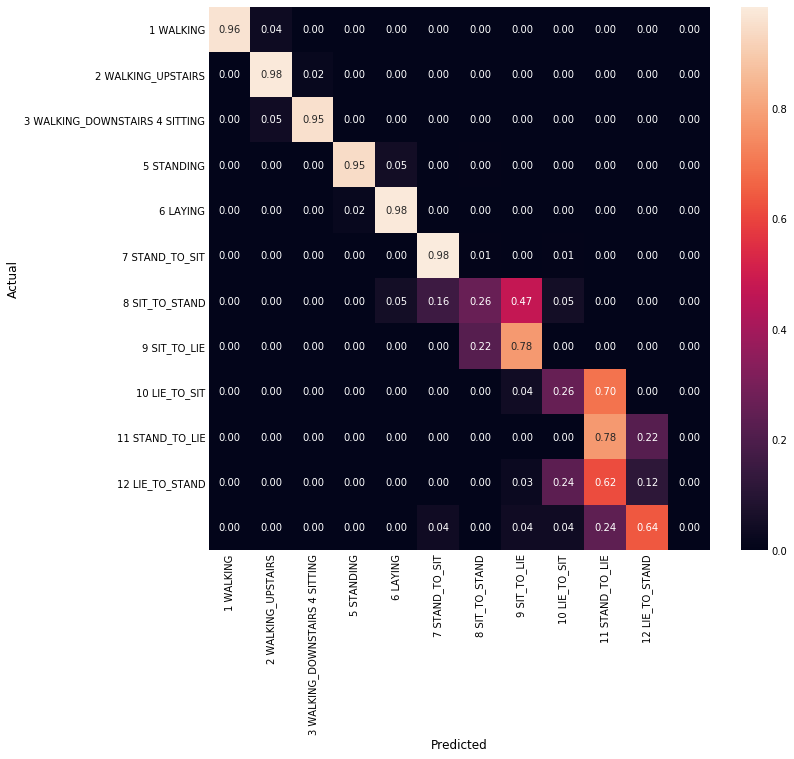

In [62]:
#Affichage matrice de confusion
cm = confusion_matrix(y_test, y_pred_arr, np.unique(y))#matrice de confusion 
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels = labels, yticklabels= labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
